In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
file = "C:/Users/Sriram/Downloads/spam.csv"

In [3]:
#!pip install chardet

In [4]:

import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7272080023536335, 'language': ''}

In [5]:
df = pd.read_csv(file,encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns  = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.rename(columns = {'v1':'target', 'v2':'text'}, inplace =True )
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

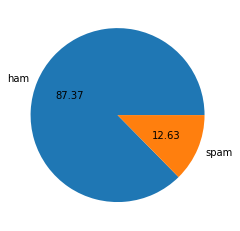

In [18]:
plt.pie(df.target.value_counts(), labels = ['ham','spam'], autopct = "%0.2f")
plt.show()

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sriram\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['old_text'] = df['text']

In [21]:
 df['no_of_characters']= df['text'].apply(len)

In [22]:
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [23]:
df['no_of_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [24]:
df['no_of_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,old_text,no_of_characters,no_of_words,no_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[df.target == 0].describe()

,target,no_of_characters,no_of_words,no_of_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.123782,1.820195
std,0.0,56.358207,13.493970,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [27]:
df[df.target == 1].describe()

,target,no_of_characters,no_of_words,no_of_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.970904
std,0.0,30.137753,7.008418,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


<AxesSubplot:xlabel='no_of_characters', ylabel='Count'>

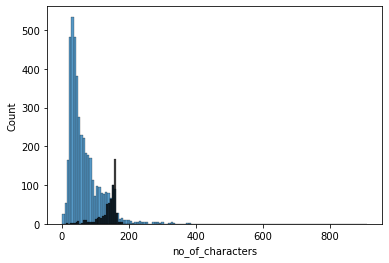

In [28]:
sns.histplot(df[df.target==0]['no_of_characters'])
sns.histplot(df[df.target==1]['no_of_characters'], color = 'black')

<AxesSubplot:xlabel='no_of_words', ylabel='Count'>

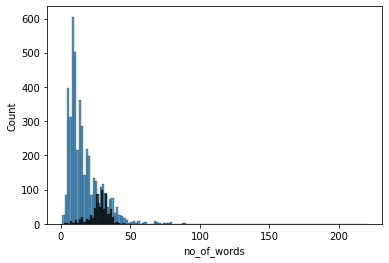

In [29]:
sns.histplot(df[df.target==0]['no_of_words'])
sns.histplot(df[df.target==1]['no_of_words'], color = 'black')

In [30]:
def lowering_text(text):
    text = text.lower()
    return text    

In [31]:
df['text'] = df['text'].apply(lowering_text)

In [32]:
df['text'].head()

0    go until jurong point, crazy.. available only ...
1                        ok lar... joking wif u oni...
2    free entry in 2 a wkly comp to win fa cup fina...
3    u dun say so early hor... u c already then say...
4    nah i don't think he goes to usf, he lives aro...
Name: text, dtype: object

In [33]:
def tokenizer(text):
    text = nltk.word_tokenize(text)
    return text

In [34]:
df['text'] = df['text'].apply(tokenizer)

In [35]:
df.head()

,target,text,old_text,no_of_characters,no_of_words,no_of_sentences
0,0,"[go, until, jurong, point, ,, crazy, .., avail...","Go until jurong point, crazy.. Available only ...",111,24,2
1,0,"[ok, lar, ..., joking, wif, u, oni, ...]",Ok lar... Joking wif u oni...,29,8,2
2,1,"[free, entry, in, 2, a, wkly, comp, to, win, f...",Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,"[u, dun, say, so, early, hor, ..., u, c, alrea...",U dun say so early hor... U c already then say...,49,13,1
4,0,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
def remove_special_characters(text):
    k = []
    for i in text:
        if i.isalnum():
            k.append(i)
    return k

In [37]:
df['text'] = df['text'].apply(remove_special_characters)

In [38]:
from nltk.corpus import stopwords
#nltk.download()
import string

def remove_stopwords_punctuation(text):
    j=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            j.append(i)
    return j
        
        

In [39]:
df['text'] = df['text'].apply(remove_stopwords_punctuation)

In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def stemming(text):
    u=[]
    for i in text:
        u.append(ps.stem(i))
        
    return " ".join(u)
    

In [51]:
df['text'] = df['text'].apply(stemming)

In [52]:
df['text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth el next...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [60]:
from wordcloud import WordCloud
wc= WordCloud(width =1000, height = 1000, min_font_size = 10)

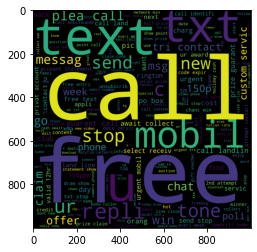

In [61]:
plt.imshow(wc.generate(df[df['target'] == 1]['text'].str.cat(sep =" ")))

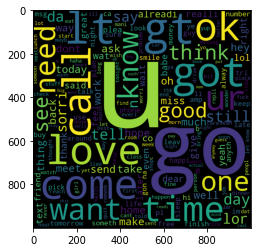

In [62]:
plt.imshow(wc.generate(df[df['target'] == 0]['text'].str.cat(sep =" ")))

In [63]:
spam_corpus = []
for i in df[df.target == 1]['text'].tolist():
    for j in i.split():
        spam_corpus.append(j)

In [64]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [65]:
ham_corpus = []
for i in df[df.target == 0]['text'].tolist():
    for j in i.split():
        ham_corpus.append(j)

In [66]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promi',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promi',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'way'

In [69]:
from collections import Counter 

In [76]:
pd.DataFrame(Counter(spam_corpus).most_common(50)).head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


In [77]:
pd.DataFrame(Counter(ham_corpus).most_common(50)).head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia')])

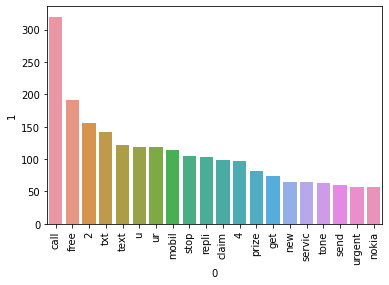

In [85]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation = 90)


C:\Users\Sriram\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one')])

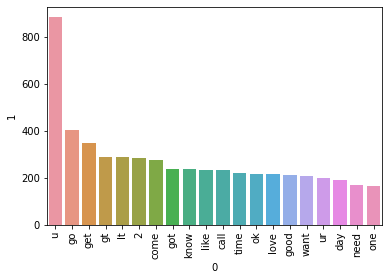

In [87]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation = 90)


# Model

In [114]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

cv = CountVectorizer()
tfidf = TfidfVectorizer()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

### USing CountVectorizer

In [90]:
X = cv.fit_transform(df['text']).toarray()

In [91]:
y = df['target'].values

In [96]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [98]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)

In [103]:
print("Gaussian accuracy: {}"  .format(accuracy_score(y_test,y_pred1)))
print("Multinomial accuracy: {}" .format( accuracy_score(y_test,y_pred2)))
print("Bernouli accuracy: {}" .format(accuracy_score(y_test,y_pred3)))

Gaussian accuracy: 0.8810444874274661
Multinomial accuracy: 0.9642166344294004
Bernouli accuracy: 0.9709864603481625


In [109]:
print("Gaussian: \n{} " .format(confusion_matrix(y_test,y_pred1)))
print("Multinomial:\n {}".format(confusion_matrix(y_test,y_pred2)))
print("Bernouli: \n{}".format(confusion_matrix(y_test,y_pred3)))

Gaussian: 
[[793 103]
 [ 20 118]] 
Multinomial:
 [[871  25]
 [ 12 126]]
Bernouli: 
[[893   3]
 [ 27 111]]


In [110]:
print("Gaussian Precision: {}"  .format(precision_score(y_test,y_pred1)))
print("Multinomial Precision: {}" .format(precision_score(y_test,y_pred2)))
print("Bernouli Precision: {}" .format(precision_score(y_test,y_pred3)))

Gaussian Precision: 0.5339366515837104
Multinomial Precision: 0.8344370860927153
Bernouli Precision: 0.9736842105263158


### Using TFidf

In [115]:
X1 = tfidf.fit_transform(df['text']).toarray()

In [117]:
y1 = df['target'].values

In [118]:
X1_train,X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 2)

In [121]:
gnb.fit(X1_train,y1_train)
y1_pred1 = gnb.predict(X1_test)

mnb.fit(X1_train, y1_train)
y1_pred2 = mnb.predict(X1_test)

bnb.fit(X1_train, y1_train)
y1_pred3 = bnb.predict(X1_test)

In [122]:
print("Gaussian accuracy: {}"  .format(accuracy_score(y1_test,y1_pred1)))
print("Multinomial accuracy: {}" .format( accuracy_score(y1_test,y1_pred2)))
print("Bernouli accuracy: {}" .format(accuracy_score(y1_test,y1_pred3)))
print("Gaussian: \n{} " .format(confusion_matrix(y1_test,y1_pred1)))
print("Multinomial:\n {}".format(confusion_matrix(y1_test,y1_pred2)))
print("Bernouli: \n{}".format(confusion_matrix(y1_test,y1_pred3)))
print("Gaussian Precision: {}"  .format(precision_score(y1_test,y1_pred1)))
print("Multinomial Precision: {}" .format(precision_score(y1_test,y1_pred2)))
print("Bernouli Precision: {}" .format(precision_score(y1_test,y1_pred3)))

Gaussian accuracy: 0.8771760154738878
Multinomial accuracy: 0.9593810444874274
Bernouli accuracy: 0.9709864603481625
Gaussian: 
[[794 102]
 [ 25 113]] 
Multinomial:
 [[896   0]
 [ 42  96]]
Bernouli: 
[[893   3]
 [ 27 111]]
Gaussian Precision: 0.5255813953488372
Multinomial Precision: 1.0
Bernouli Precision: 0.9736842105263158


## Tfidf with multinomial has best precision

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [125]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [126]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [127]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

### For Countvectorizer

In [128]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.9700193423597679
Precision -  1.0
For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9464285714285714
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.9166666666666666
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9458413926499033
Precision -  0.9456521739130435
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9663865546218487


### For Tfidf

In [131]:
accuracy_scores1 = []
precision_scores1 = []

for name,clf in clfs.items():
    
    current_accuracy1,current_precision1 = train_classifier(clf, X1_train,y1_train,X1_test,y1_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy1)
    print("Precision - ",current_precision1)
    
    accuracy_scores1.append(current_accuracy1)
    precision_scores1.append(current_precision1)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9709864603481625
Precision -  0.990909090909091
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8712121212121212
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9535783365570599
Precision -  0.9326923076923077
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9495798319327731


### using tfidf with 4000 max_features

In [135]:
tfidf1 = TfidfVectorizer(max_features = 4000)

In [136]:
X2 = tfidf1.fit_transform(df['text']).toarray()

In [137]:
y2 = df['target'].values

In [138]:
X2_train,X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 2)

In [139]:
accuracy_scores2 = []
precision_scores2 = []

for name,clf in clfs.items():
    
    current_accuracy2,current_precision2 = train_classifier(clf, X2_train,y2_train,X2_test,y2_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy2)
    print("Precision - ",current_precision2)
    
    accuracy_scores2.append(current_accuracy2)
    precision_scores2.append(current_precision2)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9680851063829787
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.84
For  LR
Accuracy -  0.9555125725338491
Precision -  0.96
For  RF
Accuracy -  0.9777562862669246
Precision -  0.9914529914529915
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9391304347826087
For  BgC
Accuracy -  0.9555125725338491
Precision -  0.8650793650793651
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.940677966101695


In [141]:
import pickle
pickle.dump(tfidf1,open('vectorizertfidf1.pkl','wb'))
pickle.dump(mnb,open('modelmnb.pkl','wb'))